# Example of visualization of RIXS data

- Author: Mauro Rovezzi <mauro.rovezzi@esrf.fr>
- Date: 2022-08
- Citation: [M Rovezzi and P Glatzel 2014 Semicond. Sci. Technol. 29 023002](https://doi.org/10.1088/0268-1242/29/2/023002)
- License: [Creative Commons Attribution-ShareAlike 4.0 International](http://creativecommons.org/licenses/by-sa/4.0/)

The scope of this notebook is to show a simple workflow based on Larch for reading **Resonant Inelastic X-ray Scattering (RIXS)** data collected at a beamline, convert them to a *standard* format, visualize the RIXS plane and take line cuts. 

Currently, Larch does not provide a GUI (Graphical User Interface) for RIXS, but contributions for implementing are welcome.

Feel free to modify and build on top Feedbacks, comments



The following dataset is used for this example

![Mn 1s2p RIXS plane with cuts of GaMnN sample](../rixsdata/RIXSplane_example_1s2pGaMnN.png)

## Step 1: from raw data to XYZ

The first step is to convert raw data collected at the beamline to a three-columns array, XYZ. The following collection modes exists:

1. `rixs` (standard mode): for each emission energy $E_{out}$ (= Y axis), scan the incoming beam energy $E_{in}$ (= X axis) measuring the signal (= Z axis).
2. `rixs_et` (energy transfer mode): for each incoming beam energy $E_{in}$, scan the emission energy by adjusting the scanning range to a given energy transfer ($E_{et} = E_{in} - E_{out}$) (Y axis).
3. `rixs_disp` (dispersive mode): scan the incoming beam energy and collect a dispersive emission image.

Here only the cases `rixs` and `rixs_et` are considered.

### How this is done in Larch

This step in Larch is done by implementing a specific *reader* function, depending how the data are collected on the beamline. Currently, the following beamlines are supported:

- APS 13-ID-E, GSECARS-CAT: `from larch.io.rixs_aps_gsecars import get_rixs_13ide`
- ESRF BM16, FAME-UHD: `from larch.io.rixs_esrf_fame import get_rixs_bm16`
- ESRF ID26: `from larch.io.rixs_esrf_id26 import get_rixs_id26`

Implementing such function is relatively easy and you are welcome to contribute it to Larch or simply provide an example of your data.


### Example how to generate XYZ data from a Spec file and save to HDF5

download the raw data (Spec file collected at ESRF/ID26 beamline) from a public share

In [1]:
import tempfile
from urllib.request import urlretrieve

DATA_LNK = 'https://nextcloud.osug.fr/index.php/s/5Ty9NtwY5NYbLTK/download'
tmpfn = tempfile.mktemp(prefix='rawdata_', suffix='.spec')

dfn, dmsg = urlretrieve(DATA_LNK, tmpfn)

print(f"raw data saved in: {tmpfn}")

raw data saved in: /tmp/rawdata_nofkl__9.spec


read the raw data and save the XYZ arrays in a HDF5 file

In [2]:
from larch.io.rixs_esrf_id26 import get_rixs_id26

params = dict(
    scans = "1:126",
    sample_name="GaMnN",
    mode='rixs',
    mot_axis2="Spec.Energy",  #: motor name for the spectrometer
    counter_signal="zap_det_dtc",  #: counter for the fluorescence signal
    counter_mon="arr_I02sum",  #: counter used for I0 noramlizing the incoming beam intensity
    save=True,
)

rixs_dict = get_rixs_id26(tmpfn, **params)


[io_rixs_id26] INFO : Loaded scan 1: 5880.0 eV
[io_rixs_id26] INFO : Loaded scan 2: 5880.2 eV
[io_rixs_id26] INFO : Loaded scan 3: 5880.4 eV
[io_rixs_id26] INFO : Loaded scan 4: 5880.6 eV
[io_rixs_id26] INFO : Loaded scan 5: 5880.8 eV
[io_rixs_id26] INFO : Loaded scan 6: 5881.0 eV
[io_rixs_id26] INFO : Loaded scan 7: 5881.2 eV
[io_rixs_id26] INFO : Loaded scan 8: 5881.4 eV
[io_rixs_id26] INFO : Loaded scan 9: 5881.6 eV
[io_rixs_id26] INFO : Loaded scan 10: 5881.8 eV
[io_rixs_id26] INFO : Loaded scan 11: 5882.0 eV
[io_rixs_id26] INFO : Loaded scan 12: 5882.2 eV
[io_rixs_id26] INFO : Loaded scan 13: 5882.4 eV
[io_rixs_id26] INFO : Loaded scan 14: 5882.6 eV
[io_rixs_id26] INFO : Loaded scan 15: 5882.8 eV
[io_rixs_id26] INFO : Loaded scan 16: 5883.0 eV
[io_rixs_id26] INFO : Loaded scan 17: 5883.2 eV
[io_rixs_id26] INFO : Loaded scan 18: 5883.4 eV
[io_rixs_id26] INFO : Loaded scan 19: 5883.6 eV
[io_rixs_id26] INFO : Loaded scan 20: 5883.8 eV
[io_rixs_id26] INFO : Loaded scan 21: 5884.0 eV
[

## Step 2: read XYZ data and work with a RIXS plane

The XYZ data generated by the `get_rixs_*` function are read into a `RixsData` object, which has some utility methods to work with RIXS data. The previously saved HDF5 is used as a starting point here.

In [3]:
from larch.io.rixsdata import RixsData

rd = RixsData("GaMnN_rixs")
rd.load_from_h5(rixs_dict['fname_out'])

[gridxyz] INFO : Gridding data with scipy/linear...
[gridxyz] INFO : Gridding data with scipy/linear...
[larch.io.rixsdata] INFO : RIXS map loaded from file: /tmp/rawdata_nofkl__9_rixs.h5


plot in energy transfer

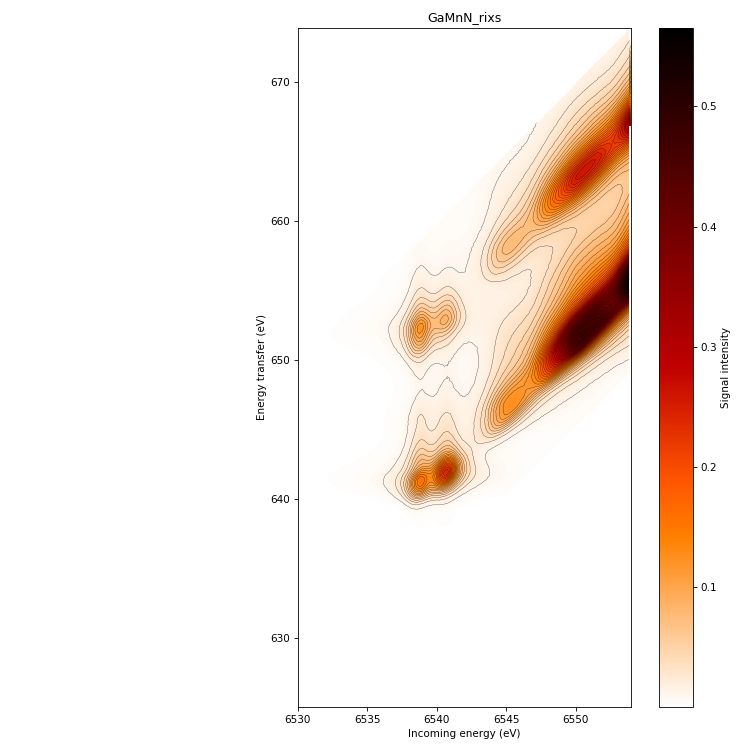

In [4]:
%matplotlib widget
from larch.plot.plot_rixsdata import plot_rixs

fig = plot_rixs(rd)

or plot as emission energy

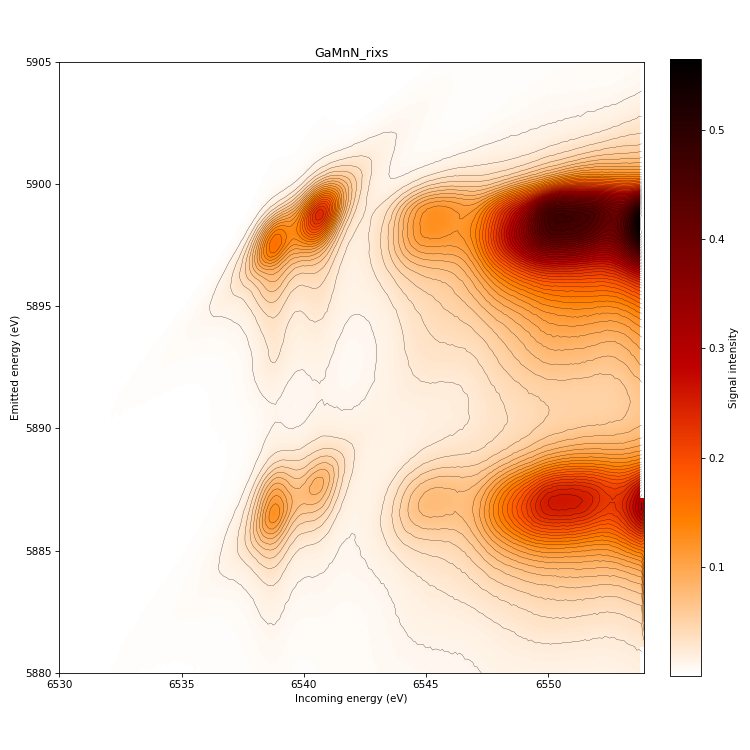

In [5]:
fig = plot_rixs(rd, et=False)

### Select a region

In [6]:
rd.crop((6535, 5886, 6544, 5906))
#rd.crop((6535, 638, 6544, 649))

[larch.io.rixsdata] INFO : Gridding data...


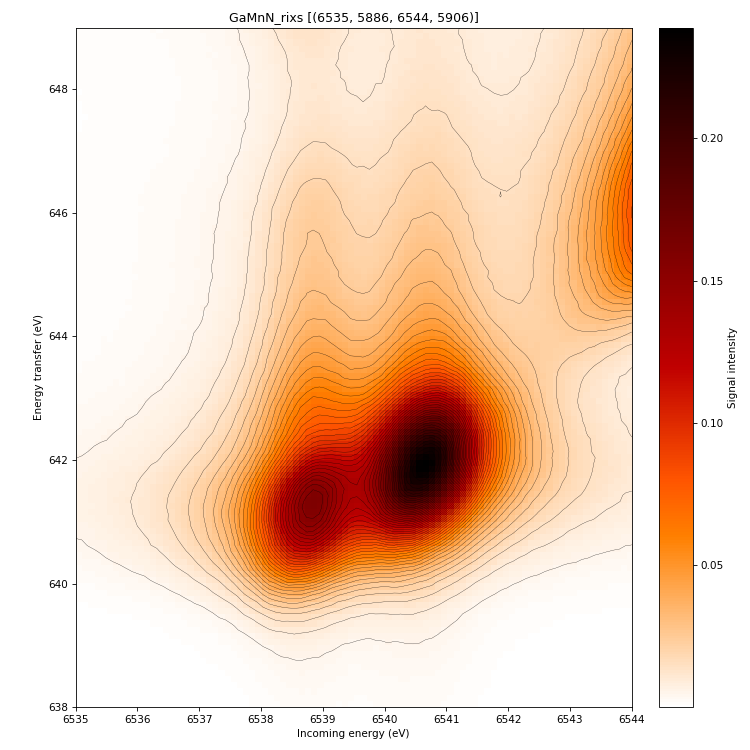

In [7]:
fig = plot_rixs(rd)

to reset the RIXS plane to original range

In [8]:
rd.reset()

[larch.io.rixsdata] INFO : resetting to initial data (grid RIXS plane and line cuts)
[gridxyz] INFO : Gridding data with scipy/linear...
[gridxyz] INFO : Gridding data with scipy/linear...


### Line cuts

In [9]:
#
rd.cut(5897.60, "CEE", label="Ka1_pre1max")
rd.cut(5898.91, "CEE", label="Ka1_pre2max")
rd.cut(5886.49, "CEE", label="Ka2_pre1max")
rd.cut(5887.71, "CEE", label="Ka2_pre2max")
#
rd.cut(6538.8, "CIE", label="pre1")
rd.cut(6540.57, "CIE", label="pre2")
#
rd.cut(641.9, "CET")

[larch.io.rixsdata] INFO : added RIXS CEE cut: 'Ka1_pre1max'
[larch.io.rixsdata] INFO : added RIXS CEE cut: 'Ka1_pre2max'
[larch.io.rixsdata] INFO : added RIXS CEE cut: 'Ka2_pre1max'
[larch.io.rixsdata] INFO : added RIXS CEE cut: 'Ka2_pre2max'
[larch.io.rixsdata] INFO : added RIXS CIE cut: 'pre1'
[larch.io.rixsdata] INFO : added RIXS CIE cut: 'pre2'
[larch.io.rixsdata] INFO : added RIXS CET cut: 'CET_641.9'


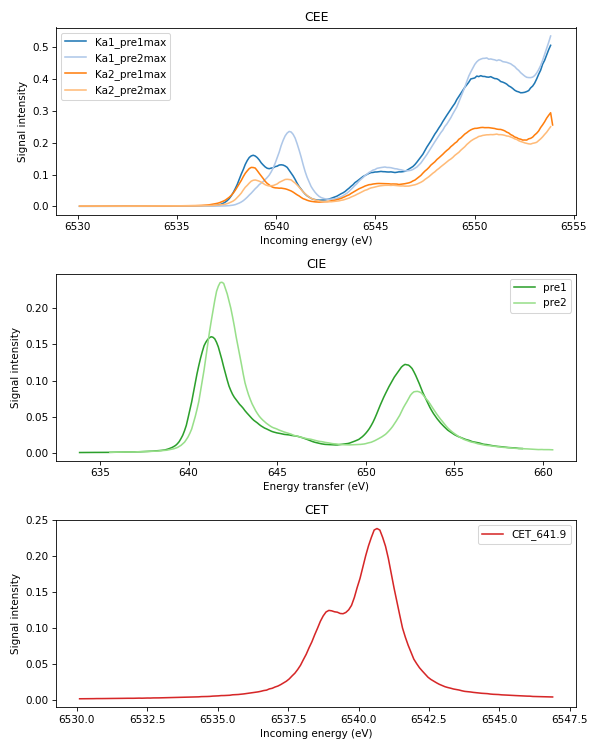

In [10]:
from larch.plot.plot_rixsdata import plot_rixs_cuts

fig = plot_rixs_cuts(rd)